##**Preprocessing**

In [ ]:
import pandas as pd
import nltk
import string
import re
import numpy as np
import unicodedata
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

data = pd.read_csv("Tweets.csv")

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-15 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-15 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-15 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-15 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-15 11:14,NaN,Pacific Time (US & Canada)


###**printing relevant columns**

In [ ]:
pd.set_option('display.max_colwidth', -1)
data2 = data [['airline_sentiment','airline_sentiment_confidence','text']]
data2.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,@VirginAmerica What @dhepburn said.
1,positive,0.3486,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,0.6837,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,1.0000,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1.0000,@VirginAmerica and it's a really big bad thing about it
5,negative,1.0000,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,0.6745,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,0.6340,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,0.6559,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,1.0000,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


In [ ]:
print(data2.shape)

(14640, 3)


In [ ]:
data2.head(50)

,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,@VirginAmerica What @dhepburn said.
1,positive,0.3486,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,0.6837,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,1.0000,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1.0000,@VirginAmerica and it's a really big bad thing about it
5,negative,1.0000,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,0.6745,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,0.6340,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,0.6559,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,1.0000,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


###**converting to lowercase**

In [ ]:
data2.loc[:, "text"]= data2.text.apply(lambda x: x.lower())
data2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,@virginamerica what @dhepburn said.
1,positive,0.3486,@virginamerica plus you've added commercials to the experience... tacky.
2,neutral,0.6837,@virginamerica i didn't today... must mean i need to take another trip!
3,negative,1.0000,"@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1.0000,@virginamerica and it's a really big bad thing about it


###**testing**

In [ ]:
sample_text = "@blahblah https://www.google.com Maybe      I'm mad but I'm now the proud owner 🔥❤️ of a potentially amazing and 1st #bendy #iPhone6, &amp; it's so... much bigger than the #4s :D"

In [ ]:
sample_text = sample_text.lower()
print(sample_text)
sample_text = remove_pattern(sample_text, "@[\w]*")
print(sample_text)
sample_text = unescape(sample_text)
print(sample_text)
sample_text = remove_URL(sample_text)
print(sample_text)
sample_text = replace_contractions(sample_text)
print(sample_text)
sample_text = replace_ordinal_numbers(sample_text)
print(sample_text)
sample_text = remove_numbers(sample_text)
print(sample_text)
print('Extracted emoticons and emojis:', create_emoticon_feature(sample_text))
sample_text2 = sample_text
sample_text2 = replace_emoticons(sample_text2)
print(sample_text2)
sample_text2 = replace_emoji(sample_text2)
print(sample_text2)
sample_text = remove_emoticon(sample_text)
print(sample_text)
sample_text = remove_punctuation(sample_text)
sample_text2 = remove_punctuation(sample_text2)
print(sample_text)
sample_text = remove_whitespace(sample_text)
sample_text2 = remove_whitespace(sample_text2)
print(sample_text)
sample_text = remove_stopwords(sample_text)
sample_text2 = remove_stopwords(sample_text2)
print(sample_text)
sample_text = remove_non_ascii(sample_text)
sample_text2 = remove_non_ascii(sample_text2)
print(sample_text)
sample_text = lemmatize_verbs(sample_text)
sample_text2 = lemmatize_verbs(sample_text2)
print(sample_text)
print(sample_text2)

@blahblah https://www.google.com maybe      i'm mad but i'm now the proud owner 🔥❤️ of a potentially amazing and 1st #bendy #iphone6, &amp; it's so... much bigger than the #4s :d


NameError: ignored

###**removing @user**

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

data2['text'] = np.vectorize(remove_pattern)(data2['text'], "@[\w]*")
data2.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,what said.
1,positive,0.3486,plus you've added commercials to the experience... tacky.
2,neutral,0.6837,i didn't today... must mean i need to take another trip!
3,negative,1.0000,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1.0000,and it's a really big bad thing about it
5,negative,1.0000,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying va
6,positive,0.6745,"yes, nearly every time i fly vx this “ear worm” won’t go away :)"
7,neutral,0.6340,"really missed a prime opportunity for men without hats parody, there. https://t.co/mwpg7grezp"
8,positive,0.6559,"well, i didn't…but now i do! :-d"
9,positive,1.0000,"it was amazing, and arrived an hour early. you're too good to me."


###**replacing &, >, <**

In [ ]:
def unescape(s):
  s = s.replace("&lt;", "<")
  s = s.replace("&gt;", ">")
  s = s.replace("&amp;", "&")
  return s

In [ ]:
data2.loc[:, 'text']= data2.text.apply(lambda x:unescape(x))
data2.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,what said.
1,positive,0.3486,plus you've added commercials to the experience... tacky.
2,neutral,0.6837,i didn't today... must mean i need to take another trip!
3,negative,1.0000,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,1.0000,and it's a really big bad thing about it
5,negative,1.0000,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying va
6,positive,0.6745,"yes, nearly every time i fly vx this “ear worm” won’t go away :)"
7,neutral,0.6340,"really missed a prime opportunity for men without hats parody, there. https://t.co/mwpg7grezp"
8,positive,0.6559,"well, i didn't…but now i do! :-d"
9,positive,1.0000,"it was amazing, and arrived an hour early. you're too good to me."


###**removing URL**

In [ ]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)
data2['text']= data2['text'].apply(lambda x:remove_URL(x))
data2.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,what said.
1,positive,0.3486,plus you've added commercials to the experience... tacky.
2,neutral,0.6837,i didn't today... must mean i need to take another trip!
3,negative,1.0000,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,1.0000,and it's a really big bad thing about it
5,negative,1.0000,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying va
6,positive,0.6745,"yes, nearly every time i fly vx this “ear worm” won’t go away :)"
7,neutral,0.6340,"really missed a prime opportunity for men without hats parody, there."
8,positive,0.6559,"well, i didn't…but now i do! :-d"
9,positive,1.0000,"it was amazing, and arrived an hour early. you're too good to me."


###**replacing contractions**

In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 6.9 MB/s 
     |████████████████████████████████| 106 kB 45.2 MB/s 


In [ ]:
import contractions

In [ ]:
def replace_contractions(text):
    return contractions.fix(text)
data2['text']= data2['text'].apply(lambda x:replace_contractions(x))
data2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,what said.
1,positive,0.3486,plus you have added commercials to the experience... tacky.
2,neutral,0.6837,i did not today... must mean i need to take another trip!
3,negative,1.0000,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,1.0000,and it is a really big bad thing about it


###**replace ordinals**

In [ ]:
pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 5.3 MB/s 


In [ ]:
from num2words import num2words

def replace_ordinal_numbers(text):
    re_results = re.findall('(\d+(st|nd|rd|th))', text)
    for enitre_result, suffix in re_results:
        num = int(enitre_result[:-len(suffix)])
        text = text.replace(enitre_result, num2words(num, ordinal=True))
    return text


""" def replace_numbers(text):
    re_results = re.findall('\d+', text)
    for term in re_results:
        num = int(term)
        text = text.replace(term, num2words(num))
    return text """


def convert_numbers(text):
    text = replace_ordinal_numbers(text)
   # text = replace_numbers(text)

    return text

data2['text']= data2['text'].apply(lambda x:convert_numbers(x))
data2.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,what said.
1,positive,0.3486,plus you have added commercials to the experience... tacky.
2,neutral,0.6837,i did not today... must mean i need to take another trip!
3,negative,1.0000,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,1.0000,and it is a really big bad thing about it
5,negative,1.0000,seriously would pay $30 a flight for seats that did not have this playing.\nit is really the only bad thing about flying va
6,positive,0.6745,"yes, nearly every time i fly vx this “ear worm” will not go away :)"
7,neutral,0.6340,"really missed a prime opportunity for men without hats parody, there."
8,positive,0.6559,"well, i did not…but now i do! :-d"
9,positive,1.0000,"it was amazing, and arrived an hour early. you are too good to me."


In [ ]:
data2.loc[240:242,:]

,airline_sentiment,airline_sentiment_confidence,text
240,neutral,1.0,any updates on flight 413 from jfk > lax
241,neutral,1.0,spruce moose!
242,negative,1.0,"the css on your site is a 404 right now, please fix. site unusable."


###**remove numbers**

In [ ]:
def remove_numbers(text):
  if '<3' not in text:
    result = re.sub(r'\d+', '', text)
    return result
  else:
    return text
data2['text']= data2['text'].apply(lambda x:remove_numbers(x))
data2.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,what said.
1,positive,0.3486,plus you have added commercials to the experience... tacky.
2,neutral,0.6837,i did not today... must mean i need to take another trip!
3,negative,1.0000,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,1.0000,and it is a really big bad thing about it
5,negative,1.0000,seriously would pay $ a flight for seats that did not have this playing.\nit is really the only bad thing about flying va
6,positive,0.6745,"yes, nearly every time i fly vx this “ear worm” will not go away :)"
7,neutral,0.6340,"really missed a prime opportunity for men without hats parody, there."
8,positive,0.6559,"well, i did not…but now i do! :-d"
9,positive,1.0000,"it was amazing, and arrived an hour early. you are too good to me."


###**make copy of dataset**

In [ ]:
data3 = data2.copy()
data3.head()

,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,what said.
1,positive,0.3486,plus you have added commercials to the experience... tacky.
2,neutral,0.6837,i did not today... must mean i need to take another trip!
3,negative,1.0000,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,1.0000,and it is a really big bad thing about it


###**extract emoticons and emojis**

In [ ]:
import json

with open('emoticon_dict.json') as json_file:
    emoticon_dict = json.load(json_file)

In [ ]:
import json
with open('emoji_dict.json') as json_file:
    emoji_dict = json.load(json_file)

FileNotFoundError: ignored

In [ ]:
def create_emoticon_feature(text):
  emoticon_list = ""
  for key in emoticon_dict:
    if key in text:
      if key not in emoticon_list:
        emoticon_list = emoticon_list+emoticon_dict[key]+" "
  unicode_text = ''.join(r'\U{:08X}'.format(ord(chr)) for chr in text)
  for key in emoji_dict:
    strkey = str(key)
    if str(key) in str(unicode_text):
      if emoji_dict[key] not in emoticon_list:
        emoticon_list = emoticon_list+emoji_dict[key]+" "
  return (emoticon_list)

data3['emoticon_feature'] = data3['text'].apply(lambda x: create_emoticon_feature(x))
data3.head(20)

In [ ]:
data3['emoticon_feature'].value_counts()

###**remove emoticons**

In [ ]:
def remove_emoticon(text):
  for key in emoticon_dict:
    if key in text:
      text = text.replace(key, '')
  return text

data2['text'] = data2['text'].apply(lambda x: remove_emoticon(x))
data2.head(20)

###**replacing emoticons**

In [ ]:
def replace_emoticons(text):
  for key in emoticon_dict:
    if key in text:
      text = text.replace(key, str(" "+emoticon_dict[key]))
  return text

data3['text'] = data3['text'].apply(lambda x: replace_emoticons(x))
data3.head(20)

,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,what said.
1,positive,0.3486,plus you have added commercials to the experience... tacky.
2,neutral,0.6837,i did not today... must mean i need to take another trip!
3,negative,1.0000,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,1.0000,and it is a really big bad thing about it
5,negative,1.0000,seriously would pay $ a flight for seats that did not have this playing.\nit is really the only bad thing about flying va
6,positive,0.6745,"yes, nearly every time i fly vx this “ear worm” will not go away happy"
7,neutral,0.6340,"really missed a prime opportunity for men without hats parody, there."
8,positive,0.6559,"well, i did not…but now i do! laugh"
9,positive,1.0000,"it was amazing, and arrived an hour early. you are too good to me."


###**replace emojis**

In [ ]:
import re

def replace_emoji(text):
  if not text.isascii():
    li = list(text.split(" "))
    newli = []
    for item in li:
      if (re.sub('[ -~]', '', item)) != "":
          unicode_text = ''.join(r'\U{:08X}'.format(ord(chr)) for chr in item)
          for key in emoji_dict:
            if key in unicode_text:
              newli.append(emoji_dict[key])
      else:
        newli.append(item)
    text=" "
    return (text.join(newli))
  return(text)

data3['text'] = data3['text'].apply(lambda x: replace_emoji(x))

In [ ]:
data3.head(20)

,airline_sentiment,airline_sentiment_confidence,text,emoticon_feature
0,neutral,1.0000,what said.,
1,positive,0.3486,plus you have added commercials to the experience... tacky.,
2,neutral,0.6837,i did not today... must mean i need to take another trip!,
3,negative,1.0000,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",
4,negative,1.0000,and it is a really big bad thing about it,
5,negative,1.0000,seriously would pay $ a flight for seats that did not have this playing.\nit is really the only bad thing about flying va,
6,positive,0.6745,"yes, nearly every time i fly vx this will not go away happy",happy
7,neutral,0.6340,"really missed a prime opportunity for men without hats parody, there.",
8,positive,0.6559,"well, i did now i do! laugh",laugh
9,positive,1.0000,"it was amazing, and arrived an hour early. you are too good to me.",


###**remove punctuations**

In [ ]:
import string
string.punctuation

def remove_punctuation(text):
  text = text.replace('\u2026','')
  punctuationfree="".join([i for i in text if i not in string.punctuation])
  return punctuationfree

data2['text'] = data2['text'].apply(lambda x: remove_punctuation(x))
data2.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,what said
1,positive,0.3486,plus you have added commercials to the experience tacky
2,neutral,0.6837,i did not today must mean i need to take another trip
3,negative,1.0000,it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,1.0000,and it is a really big bad thing about it
5,negative,1.0000,seriously would pay a flight for seats that did not have this playing\nit is really the only bad thing about flying va
6,positive,0.6745,yes nearly every time i fly vx this “ear worm” will not go away
7,neutral,0.6340,really missed a prime opportunity for men without hats parody there
8,positive,0.6559,well i did notbut now i do
9,positive,1.0000,it was amazing and arrived an hour early you are too good to me


In [ ]:
data3['text'] = data3['text'].apply(lambda x: remove_punctuation(x))

###**remove extra whitespace**

In [ ]:
def remove_whitespace(text):
    return  " ".join(text.split())

data2['text'] = data2['text'].apply(lambda x: remove_whitespace(x))
data2.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,what said
1,positive,0.3486,plus you have added commercials to the experience tacky
2,neutral,0.6837,i did not today must mean i need to take another trip
3,negative,1.0000,it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,1.0000,and it is a really big bad thing about it
5,negative,1.0000,seriously would pay a flight for seats that did not have this playing it is really the only bad thing about flying va
6,positive,0.6745,yes nearly every time i fly vx this “ear worm” will not go away
7,neutral,0.6340,really missed a prime opportunity for men without hats parody there
8,positive,0.6559,well i did notbut now i do
9,positive,1.0000,it was amazing and arrived an hour early you are too good to me


In [ ]:
data3['text'] = data3['text'].apply(lambda x: remove_whitespace(x))

###**remove stop words and tokenize**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data2['text']= data2['text'].apply(lambda x:remove_stopwords(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data2.head()

,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,[said]
1,positive,0.3486,"[plus, added, commercials, experience, tacky]"
2,neutral,0.6837,"[today, must, mean, need, take, another, trip]"
3,negative,1.0000,"[really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,1.0000,"[really, big, bad, thing]"


In [ ]:
data3['text']= data3['text'].apply(lambda x:remove_stopwords(x))

###**removing non ascii words**

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
data2['text']= data2['text'].apply(lambda x:remove_non_ascii(x))
data2.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,[said]
1,positive,0.3486,"[plus, added, commercials, experience, tacky]"
2,neutral,0.6837,"[today, must, mean, need, take, another, trip]"
3,negative,1.0000,"[really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,1.0000,"[really, big, bad, thing]"
5,negative,1.0000,"[seriously, would, pay, flight, seats, playing, really, bad, thing, flying, va]"
6,positive,0.6745,"[yes, nearly, every, time, fly, vx, , ear, worm, , go, away]"
7,neutral,0.6340,"[really, missed, prime, opportunity, men, without, hats, parody]"
8,positive,0.6559,"[well, notbut]"
9,positive,1.0000,"[amazing, arrived, hour, early, good]"


In [ ]:
data3['text']= data3['text'].apply(lambda x:remove_non_ascii(x))

###**lemmatize**

In [ ]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

data2['text'] = data2['text'].apply(lambda x:lemmatize_verbs(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# This converts the list of words into space-separated strings
data2['textString'] = data2['text'].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data2.head(20)

,airline_sentiment,airline_sentiment_confidence,text,textString
0,neutral,1.0000,[say],say
1,positive,0.3486,"[plus, add, commercials, experience, tacky]",plus add commercials experience tacky
2,neutral,0.6837,"[today, must, mean, need, take, another, trip]",today must mean need take another trip
3,negative,1.0000,"[really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]",really aggressive blast obnoxious entertainment guests face little recourse
4,negative,1.0000,"[really, big, bad, thing]",really big bad thing
5,negative,1.0000,"[seriously, would, pay, flight, seat, play, really, bad, thing, fly, va]",seriously would pay flight seat play really bad thing fly va
6,positive,0.6745,"[yes, nearly, every, time, fly, vx, , ear, worm, , go, away]",yes nearly every time fly vx ear worm go away
7,neutral,0.6340,"[really, miss, prime, opportunity, men, without, hat, parody]",really miss prime opportunity men without hat parody
8,positive,0.6559,"[well, notbut]",well notbut
9,positive,1.0000,"[amaze, arrive, hour, early, good]",amaze arrive hour early good


In [ ]:
data3['text'] = data3['text'].apply(lambda x:lemmatize_verbs(x))
data3['textString'] = data3['text'].apply(lambda x: ' '.join(x))

###**visualisation**

In [ ]:
data2['airline_sentiment'].value_counts()

negative    5755
neutral     2407
positive    1832
Name: airline_sentiment, dtype: int64

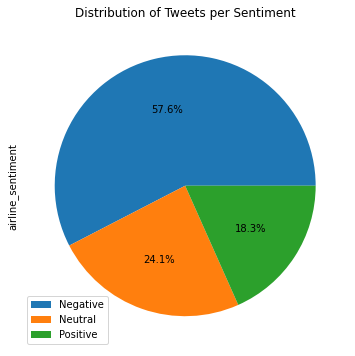

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data2['airline_sentiment'].value_counts().plot.pie(figsize=(6,6),title="Distribution of Tweets per Sentiment",labels=['','',''],autopct='%1.1f%%')
labels=["Negative","Neutral","Positive"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

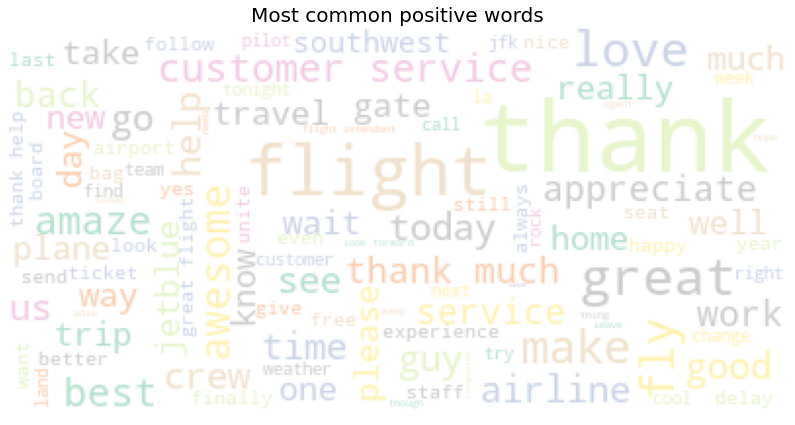

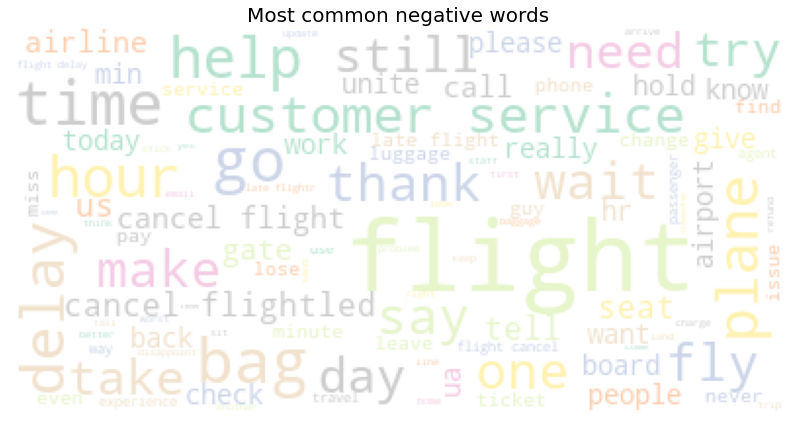

In [ ]:
from wordcloud import WordCloud
from collections import Counter

def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(14,10))
    wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')
    
#data2['clean']=data2['text'].map(clean)
#data2['clean_text']=data2['clean'].apply(lambda x: " ".join([str(word) for word in x]))

positive_words=" ".join(data2[data2.airline_sentiment=='positive']['textString'].values)
negative_words=" ".join(data2[data2.airline_sentiment=='negative']['textString'].values)

generate_wordcloud(positive_words,"positive")
generate_wordcloud(negative_words,"negative")

##**Feature Extraction and Applying ML Algorithms**

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from numpy import mean
from numpy import std

###**function to classify and compute evaluation measures**

In [ ]:
mask = data3['emoticon_feature'].values != ''
pos = np.flatnonzero(mask)
data4 = data3.iloc[pos]

In [ ]:
data4.drop('airline_sentiment_confidence', inplace=True, axis=1)
data4.drop('text', inplace=True, axis=1)
data4.drop('textString', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data4.head()

,airline_sentiment,emoticon_feature
6,positive,happy
8,positive,laugh
11,positive,heart laugh
12,positive,playful
18,positive,heart relaxed thumbs up


In [ ]:
def ml_classify(model, X_train_feature, df, j):
  rcv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  scoring = {'accuracy' : make_scorer(accuracy_score),
             'precision' : make_scorer(precision_score, average = 'macro'),
             'recall' : make_scorer(recall_score, average = 'macro'),
             'f1_score' : make_scorer(f1_score, average = 'macro')}
  scores = cross_validate(model, X_train_feature, Y_train, scoring=scoring, cv=rcv)
  df.iloc[j,1] = ('%.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
  df.iloc[j,2] = ('%.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
  df.iloc[j,3] = ('%.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
  df.iloc[j,4] = ('%.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vectorizer = CountVectorizer()
ngram_vectorizer = CountVectorizer(ngram_range = (1,2))

naive_bayes_classifier = MultinomialNB()
rf = RandomForestClassifier()
lr = LogisticRegression()
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

# X is the feature set and Y is the target
X_train = data4['emoticon_feature']
Y_train = data4['airline_sentiment']

X_train_bow = count_vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer().fit(X_train_bow)
X_train_tf = tfidf_transformer.transform(X_train_bow)
X_train_ngram = ngram_vectorizer.fit_transform(X_train)

model_list = [naive_bayes_classifier, lr, SVM, rf]
model_list_names = ['NAIVE BAYES', 'LOGISTIC REGRESSION', 'SUPPORT VECTOR MACHINE', 'RANDOM FOREST']
X_train_list = [X_train_bow,  X_train_ngram, X_train_tf]
X_train_names = ['BAG OF WORDS', 'N-GRAM', 'TF-IDF']

i = 0
j = 0

l1 =["Bag of Words", "N-Gram", "TF-IDF"]
l2 = [0, 0, 0]
l3 = [0, 0, 0]
l4 = [0, 0, 0]
l5 = [0, 0, 0]
  
# creating the DataFrame
df = pd.DataFrame(list(zip(l1, l2, l3, l4, l5))) 

df.columns = ['FEATURE','Accuracy','Precision', 'Recall', 'F-Score']

for model in model_list:
  print(model_list_names[i])
  for X_train_feature in X_train_list:
    ml_classify(model, X_train_feature, df, j)
    j+=1
  i+=1
  j=0
  print(df)
  print('\n')

NAIVE BAYES
        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.665 (0.047)  0.605 (0.087)  0.598 (0.051)  0.574 (0.063)
1  N-Gram        0.666 (0.043)  0.611 (0.094)  0.596 (0.046)  0.567 (0.058)
2  TF-IDF        0.665 (0.041)  0.606 (0.083)  0.598 (0.045)  0.573 (0.057)


LOGISTIC REGRESSION
        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.668 (0.040)  0.615 (0.080)  0.604 (0.046)  0.583 (0.058)
1  N-Gram        0.665 (0.039)  0.610 (0.079)  0.601 (0.046)  0.581 (0.058)
2  TF-IDF        0.674 (0.035)  0.626 (0.062)  0.610 (0.041)  0.591 (0.050)


SUPPORT VECTOR MACHINE
        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.665 (0.038)  0.610 (0.075)  0.599 (0.042)  0.577 (0.051)
1  N-Gram        0.664 (0.043)  0.617 (0.073)  0.601 (0.046)  0.582 (0.052)
2  TF-IDF        0.665 (0.037)  0.613 (0.064)  0.602 (0.041)  0.583 (0.049)


RANDOM FOREST
        FEATU

###**Applying ML Algorithms to dataset without emoticons**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vectorizer = CountVectorizer()
ngram_vectorizer = CountVectorizer(ngram_range = (1,2))

naive_bayes_classifier = MultinomialNB()
rf = RandomForestClassifier()
lr = LogisticRegression()
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

# X is the feature set and Y is the target
X_train = data2['textString']
Y_train = data2['airline_sentiment']

X_train_bow = count_vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer().fit(X_train_bow)
X_train_tf = tfidf_transformer.transform(X_train_bow)
X_train_ngram = ngram_vectorizer.fit_transform(X_train)

model_list = [naive_bayes_classifier, lr, SVM, rf]
model_list_names = ['NAIVE BAYES', 'LOGISTIC REGRESSION', 'SUPPORT VECTOR MACHINE', 'RANDOM FOREST']
X_train_list = [X_train_bow,  X_train_ngram, X_train_tf]
X_train_names = ['BAG OF WORDS', 'N-GRAM', 'TF-IDF']

i = 0
j = 0

l1 =["Bag of Words", "N-Gram", "TF-IDF"]
l2 = [0, 0, 0]
l3 = [0, 0, 0]
l4 = [0, 0, 0]
l5 = [0, 0, 0]
  
# creating the DataFrame
df = pd.DataFrame(list(zip(l1, l2, l3, l4, l5))) 

df.columns = ['FEATURE','Accuracy','Precision', 'Recall', 'F-Score']

for model in model_list:
  print(model_list_names[i])
  for X_train_feature in X_train_list:
    ml_classify(model, X_train_feature, df, j)
    j+=1
  i+=1
  j=0
  print(df)
  print('\n')

NAIVE BAYES
        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.758 (0.007)  0.716 (0.012)  0.640 (0.010)  0.665 (0.010)
1  N-Gram        0.753 (0.008)  0.708 (0.013)  0.638 (0.016)  0.663 (0.015)
2  TF-IDF        0.691 (0.005)  0.763 (0.024)  0.457 (0.007)  0.474 (0.011)


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.782 (0.008)  0.731 (0.011)  0.708 (0.015)  0.718 (0.012)
1  N-Gram        0.789 (0.007)  0.743 (0.006)  0.709 (0.010)  0.724 (0.008)
2  TF-IDF        0.781 (0.006)  0.756 (0.010)  0.665 (0.012)  0.698 (0.011)


SUPPORT VECTOR MACHINE
        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.769 (0.007)  0.712 (0.007)  0.702 (0.009)  0.706 (0.008)
1  N-Gram        0.770 (0.011)  0.712 (0.014)  0.706 (0.013)  0.709 (0.013)
2  TF-IDF        0.780 (0.005)  0.741 (0.009)  0.680 (0.011)  0.704 (0.010)


RANDOM FOREST
        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.766 (0.010)  0.720 (0.018)  0.663 (0.015)  0.685 (0.014)
1  N-Gram        0.762 (0.008)  0.720 (0.014)  0.657 (0.014)  0.681 (0.013)
2  TF-IDF        0.768 (0.011)  0.737 (0.018)  0.647 (0.016)  0.678 (0.016)




###**Applying ML Algorithms to Dataset with Emoticons and Emojis**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vectorizer = CountVectorizer()
ngram_vectorizer = CountVectorizer(ngram_range = (1,2))

naive_bayes_classifier = MultinomialNB()
rf = RandomForestClassifier()
lr = LogisticRegression()
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

# X is the feature set and Y is the target
X_train = data3['textString']
Y_train = data3['airline_sentiment']

X_train_bow = count_vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer().fit(X_train_bow)
X_train_tf = tfidf_transformer.transform(X_train_bow)
X_train_ngram = ngram_vectorizer.fit_transform(X_train)

model_list = [naive_bayes_classifier, lr, SVM, rf]
model_list_names = ['NAIVE BAYES', 'LOGISTIC REGRESSION', 'SUPPORT VECTOR MACHINE', 'RANDOM FOREST']
X_train_list = [X_train_bow,  X_train_ngram, X_train_tf]
X_train_names = ['BAG OF WORDS', 'N-GRAM', 'TF-IDF']

i = 0
j = 0

l1 =["Bag of Words", "N-Gram", "TF-IDF"]
l2 = [0, 0, 0]
l3 = [0, 0, 0]
l4 = [0, 0, 0]
l5 = [0, 0, 0]
  
# creating the DataFrame
df = pd.DataFrame(list(zip(l1, l2, l3, l4, l5))) 

df.columns = ['FEATURE','Accuracy','Precision', 'Recall', 'F-Score']

for model in model_list:
  print(model_list_names[i])
  for X_train_feature in X_train_list:
    ml_classify(model, X_train_feature, df, j)
    j+=1
  i+=1
  j=0
  print(df)
  print('\n')

NAIVE BAYES
        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.763 (0.009)  0.720 (0.013)  0.649 (0.014)  0.673 (0.013)
1  N-Gram        0.756 (0.008)  0.710 (0.014)  0.645 (0.014)  0.667 (0.014)
2  TF-IDF        0.696 (0.005)  0.760 (0.024)  0.467 (0.008)  0.487 (0.012)


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.786 (0.009)  0.737 (0.012)  0.715 (0.014)  0.725 (0.012)
1  N-Gram        0.792 (0.007)  0.748 (0.008)  0.715 (0.012)  0.730 (0.009)
2  TF-IDF        0.784 (0.007)  0.759 (0.010)  0.671 (0.013)  0.703 (0.012)


SUPPORT VECTOR MACHINE
        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.772 (0.011)  0.716 (0.013)  0.707 (0.014)  0.711 (0.012)
1  N-Gram        0.772 (0.008)  0.715 (0.010)  0.713 (0.012)  0.714 (0.010)
2  TF-IDF        0.784 (0.006)  0.745 (0.011)  0.686 (0.012)  0.710 (0.011)


RANDOM FOREST
        FEATURE       Accuracy      Precision         Recall        F-Score
0  Bag of Words  0.766 (0.009)  0.719 (0.015)  0.664 (0.015)  0.686 (0.014)
1  N-Gram        0.765 (0.009)  0.722 (0.016)  0.659 (0.014)  0.683 (0.013)
2  TF-IDF        0.768 (0.009)  0.739 (0.016)  0.648 (0.014)  0.678 (0.014)


